# Análisis de Datos
**Experimento:** Se calentaron 4.5 litros de agua en una olla y se tomaron las mediciones desde el tiempo $t=0$ hasta el tiempo $t=26$

In [1]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

# Define la ruta donde se guardan las imágenes en formato PDF
rutaImagenes = '../Interpolacion-Aproximacion-Polinomial/Imagenes/'

#### ***Gráfica de los Datos***
A continuación se presenta un programa que crea al vector $tiempo$ con $27$ espacialmente distribuidos y al vector $Temp$ con las observaciones tomadas. Con estos datos se realiza un gráfico de dispersión para analizar de forma gráfica el comportamiento de los mismos.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
[24.2 29.8 31.7 32.2 34.2 36.2 37.5 39.2 41.3 41.4 42.8 44.1 46.  48.2
 50.9 51.9 53.5 53.9 56.8 58.9 60.  64.6 64.4 64.9 65.4 69.3 74.5]
(27,)


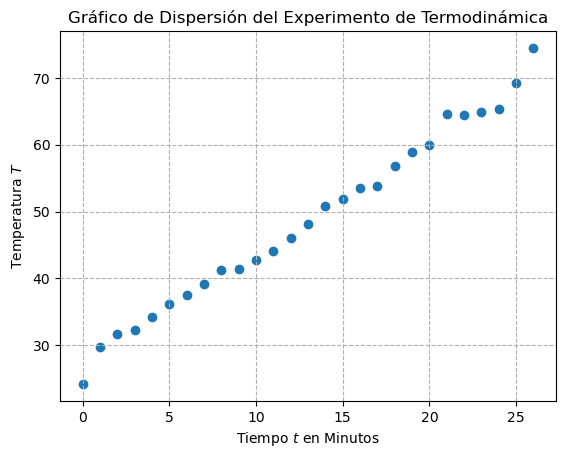

In [4]:
# Generar los datos
tiempo = np.array([i for i in range(27)])
print(tiempo)
Temp = np.array([24.2, 29.8, 31.7, 32.2, 34.2, 36.2, 37.5, 39.2, 41.3, 41.4, 42.8,
              44.1, 46, 48.2, 50.9, 51.9, 53.5, 53.9, 56.8, 58.9, 60,
              64.6, 64.4, 64.9, 65.4, 69.3, 74.5])
print(Temp)
print(np.shape(Temp))

# Crear la gráfica de dispersión
plt.scatter(tiempo,Temp)

# Configurar la gráfica
plt.ylabel('Temperatura $T$')
plt.xlabel('Tiempo $t$ en Minutos')
plt.title('Gráfico de Dispersión del Experimento de Termodinámica')
plt.grid(linestyle='--')

# Guardar el gráfico
plt.savefig(rutaImagenes + 'experimento-termodinamica.pdf')

# Mostrar la gráfica
plt.show()

#### ***Ajuste Mediante Redes Neuronales***
El siguiente código tiene como objetivo ajustar los datos mediante una regresión lineal usando un perceptron.

Primero se genera el Peso $W$ y el sesgo $b$ de forma aleatoria. Se establece el ***factor de aprendizaje*** $\alpha=0.001$. Se crean $1000$ épocas de entrenamiento. Se usa la métrica del **Error Cuadrático Medio ECM** para entrenar al algoritmo usando el Descenso del Gradiente. Finalmente se grafica la recta de regresión encontrada y la dispersión de puntos.  

0.21427410625858867 0.6735903866638494
Último error cuadrático medio:  2.2803936388237074
Último error:  2.815709951103642
W =  1.9207565820425234 b =  25.55709018958507


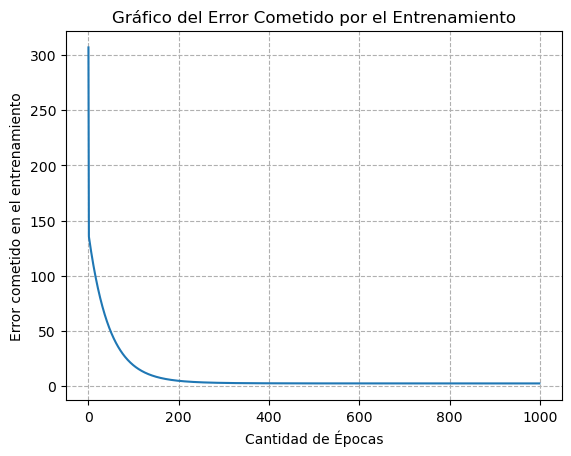

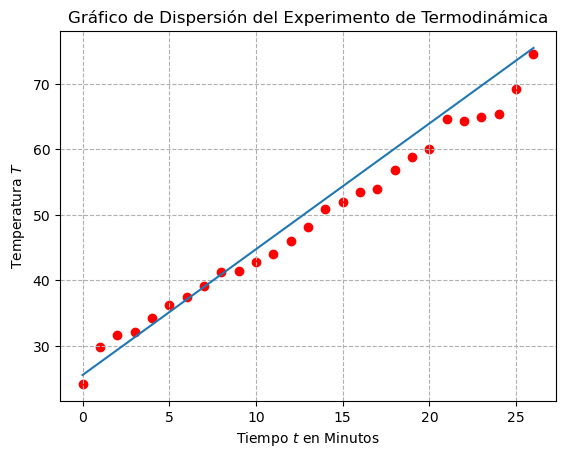

In [7]:
# Crear un perceptron para ajustar la curva

# Crear el valor aleatorio para el peso y el sesgo
W = np.random.rand()
b = np.random.rand()
print(W,b)

# Establecer el factor de aprendizaje
alpha = 0.001
error = []

# Crear el ciclo para las epocas
for epoca in range(1000):

    e = 0

    for i,t in enumerate(tiempo):
        # Calcular la salida de la neurona
        n = t*W + b
        n = max(0, n)

        # Calcular el error
        e_Dato = Temp[i] - n
        
        dW = -2*e_Dato*t
        dB = -2*e_Dato

        # Sumar al error cuadrático
        e += (e_Dato)**2

        # Actualizar el peso y el sesgo
        W = W - alpha*dW
        b = b - alpha*dB

    # Calcular el error cuadrático medio
    ECM = e / len(tiempo)
    error.append(ECM)    

print("Último error cuadrático medio: ", ECM)
print("Último error: ", e_Dato)

print("W = ",W, "b = ",b)
plt.plot(error)
plt.grid(linestyle='--')
plt.ylabel('Error cometido en el entrenamiento')
plt.xlabel('Cantidad de Épocas')
plt.title('Gráfico del Error Cometido por el Entrenamiento')
plt.show()

# Generar la recta de regresión
y = W*tiempo + np.ones(len(tiempo))*b

# Crear la gráfica de los puntos y la regresión
plt.scatter(tiempo,Temp, c='red')
plt.plot(tiempo, y)

# Configurar la gráfica
plt.grid(linestyle='--')
plt.ylabel('Temperatura $T$')
plt.xlabel('Tiempo $t$ en Minutos')
plt.title('Gráfico de Dispersión del Experimento de Termodinámica')

# Guardar el gráfico
plt.savefig(rutaImagenes + 'regresion-lineal-perceptron.pdf')

# Mostrar el gráfico
plt.show()
